# HW6

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [108]:
# load dataset
df = pd.read_csv('diamonds_500.csv')
df.head()

,carat,cut,depth,price,x,y,z
0,1.00,Very Good,63.5,3858,6.37,6.32,4.03
1,1.02,Very Good,61.6,4291,6.46,6.47,3.98
2,1.25,Premium,62.0,8099,6.88,6.84,4.25
3,0.80,Very Good,61.9,3737,5.93,5.96,3.69
4,0.91,Good,59.9,4309,6.18,6.24,3.72


In [110]:
# compute and show correlation matrix
corr_matrix = df.corr()
corr_matrix

,carat,depth,price,x,y,z
carat,1.000000,0.000490,0.913612,0.978323,0.978141,0.975653
depth,0.000490,1.000000,-0.019945,-0.034895,-0.036634,0.082426
price,0.913612,-0.019945,1.000000,0.877762,0.880222,0.874172
x,0.978323,-0.034895,0.877762,1.000000,0.999005,0.992642
y,0.978141,-0.036634,0.880222,0.999005,1.000000,0.992485
z,0.975653,0.082426,0.874172,0.992642,0.992485,1.000000


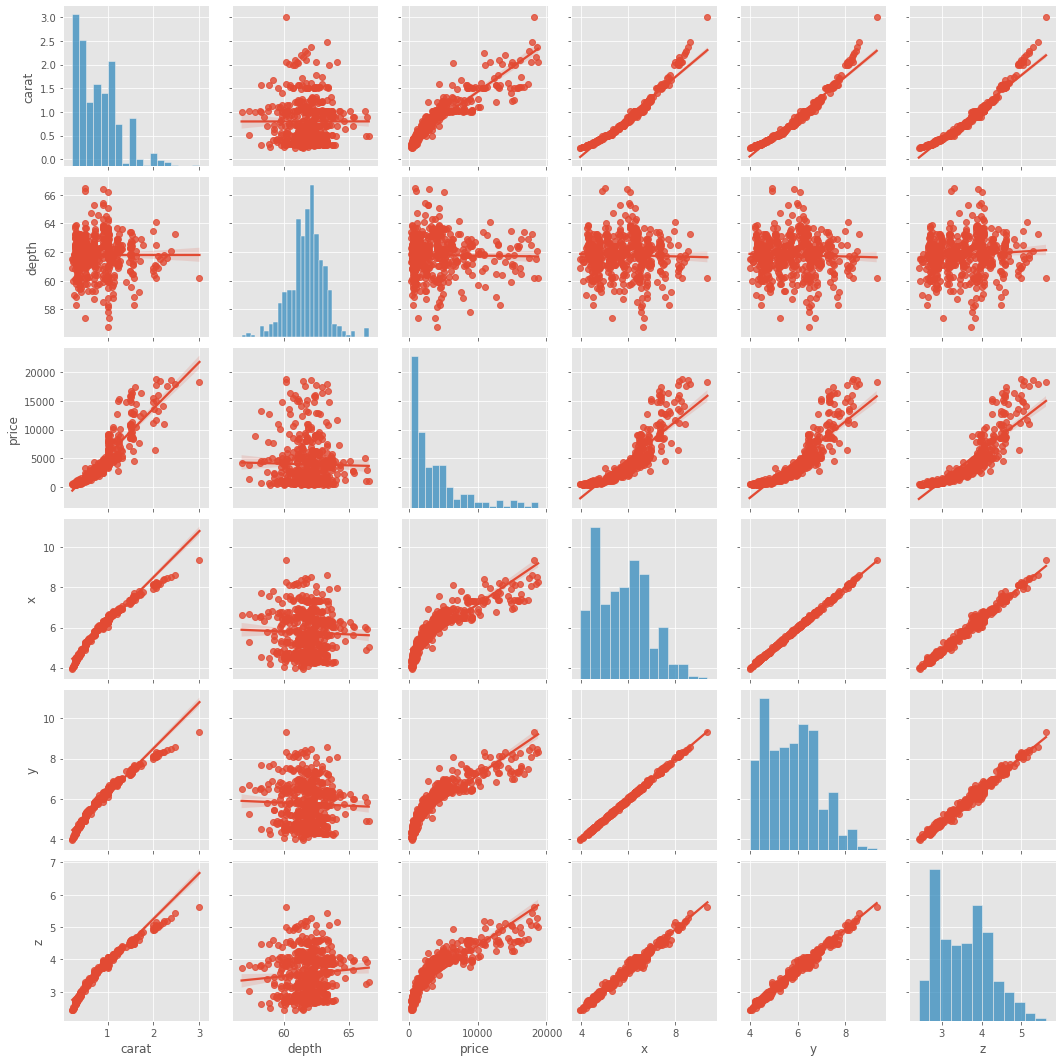

In [111]:
# visualise pairwise scatterplots (with regression line)
sns.pairplot(df, kind='reg')

Let's choose carat - price pair of features with correlation = 0.913612.

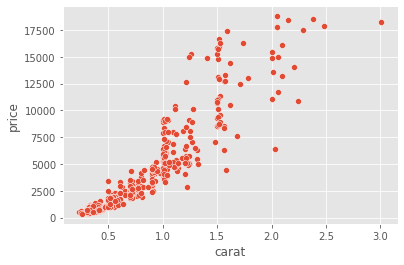

In [112]:
# scatterplot for carat - price
sns.scatterplot(data=df, x="carat", y="price")

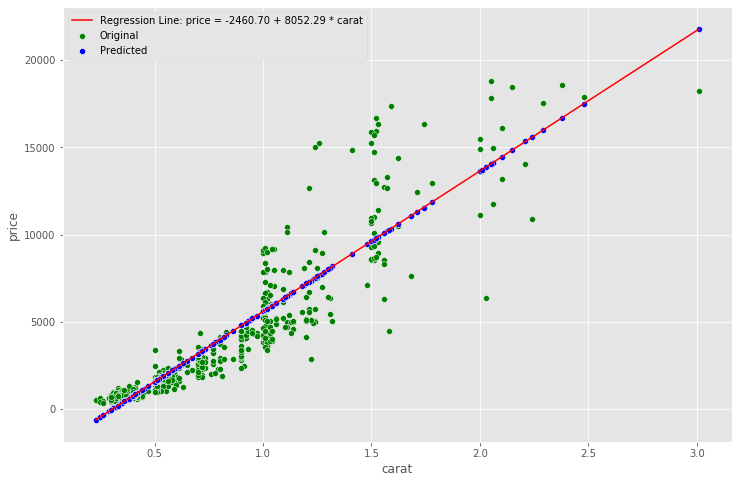

In [95]:
# build linear regression model on feature "carat" for target "price"
lr_model = LinearRegression()
lr_model.fit(df[["carat"]].values, df["price"].values)
df["predicted_price"] = lr_model.predict(df[["carat"]].values)

# plot original points [carat, price]
_, ax = plt.subplots(figsize=[12, 8])
sns.scatterplot(data=df, x="carat", y="price", color="green", ax=ax, label="Original")
# plot predictions [carat, price (predicted from carat)]
sns.scatterplot(data=df, x="carat", y="predicted_price", ax=ax, color="blue", 
                label="Predicted")

# visualize regression line and equation (slope and intercept)
slope, intercept = lr_model.coef_[0], lr_model.intercept_
sns.lineplot(data=df, x="carat", y="predicted_price", ax=ax, legend='brief', color="red",
             label="Regression Line: price = {:.2f} + {:.2f} * carat".format(intercept, slope))

Slope of the model is 8052.28. First of all, slope has positive value, so correlation between carat and price has positive direction. The value of the slope indicates that by increasing value of `carat` by 1 unit, `price` of the diamond increases by 8052.28 on average.

In [98]:
print(f"Correlation: {corr_matrix['carat']['price']}")
r2_score = lr_model.score(df[["carat"]].values, df["price"])
print(f"Determinacy coefficient: {r2_score}")

Correlation: 0.9136116464594373
Determinacy coefficient: 0.8346862405463232


Determinacy coefficient is 0.834. It means that built linear regression model explains about 83% of target feature variance. This score is quite high for our dataset, actually one can build forecasting model for price solely on carat feature. This corresponds to common knowledge about pricing of diamonds.

In [103]:
# build linear regression model on feature set {"carat", "x", "depth"} for target "price"
extended_lr_model = LinearRegression()
extended_lr_model.fit(df[["carat", "x", "depth"]].values, df["price"].values)

# interpretate obtained model
extended_r2_score = extended_lr_model.score(df[["carat", "x", "depth"]].values, 
                                            df["price"].values)
print(f"Extended model determinacy coefficient: {extended_r2_score}")

Extended model determinacy coefficient: 0.8418548487870616


Determinacy coefficient of extended model on {carat, x, depth} features is 0.842. Not a great increase from previous try. Earlier, scatterplots showed that depth has almost zero correlation with target variable, now we see that this feature didn't contribute that much. Despite feature `x` is highly correlated with target variable, it also has high correlation value with almost existing feature `carat`, so it also didn't increase model quality much.

In [107]:
def mean_rel_abs_error(model, x, y):
    predicted = model.predict(x)
    return np.mean(np.abs(y - predicted) / np.abs(y))

print("Mean Relative Absolute Error")
lr_model_err = mean_rel_abs_error(lr_model, df[["carat"]].values, df["price"].values)
ext_lr_model_err = mean_rel_abs_error(extended_lr_model, df[["carat", "x", "depth"]].values, 
                                      df["price"].values)
print(f"{{carat}} -> {{price}}: {lr_model_err}")
print(f"{{carat, x, depth}} -> {{price}}: {ext_lr_model_err}")

Mean Relative Absolute Error
{carat} -> {price}: 0.40102417980974486
{carat, x, depth} -> {price}: 0.2648060500901686


Interesting result. Extended model shows more or less significant improvement compared to single-feature model. In general both models (one-feature and multiple-feature) have adequate forecasting performance according to mean relative absolute error critetia. It is important to mention that models did not train to minimize this criteria. Extended model has 14% improvement despite the fact that it didn't show significant increase in R^2 criteria.